<a id='top'></a>
# План проекта:
### <a href='#Step_1'>Шаг 1. Импорт файла с данными и изучение общей информации</a>
#### <a href='#Step_1_conclusion'>Вывод</a>

### <a href='#Step_2'>Шаг 2. Подготовка данных</a>
#### <a href='#Step_2_1'>2.1 Замена названий стобцов</a>
#### <a href='#Step_2_2'>2.2 Преобразование типов данных</a>
#### <a href='#Step_2_3'>2.3 Обработка пропусков</a>
#### <a href='#Step_2_4'>2.4 Дополнение таблицы</a>
#### <a href='#Step_2_conclusion'>Вывод</a>

### <a href='#Step_3'>Шаг 3. Исследовательский анализ данных</a>
#### <a href='#Step_3_1'>3.1 Исследование динамики выпуска игр по годам</a>
#### <a href='#Step_3_2'>3.2 Определение актуального периода исследования</a>
#### <a href='#Step_3_3'>3.3 Исследование лидеров по выручке</a>
#### <a href='#Step_3_4'>3.4 График «ящик с усами» по глобальным продажам игр в разбивке по платформам</a>
#### <a href='#Step_3_5'>3.5 Корреляция рейтингов и выручки</a>
#### <a href='#Step_3_5'>3.6 Исследование жанров</a>
#### <a href='#Step_3_conclusion'>Вывод</a>

### <a href='#Step_4'>Шаг 4. Портрет пользователя</a>
#### <a href='#Step_4_1'>4.1 Топ-5 популярных платформ</a>
#### <a href='#Step_4_2'>4.2 Топ-5 популярных жанров</a>
#### <a href='#Step_4_3'>4.3 Влияние рейтинга ESRB на продажи в регионах</a>
#### <a href='#Step_4_conclusion'>Вывод</a>

### <a href='#Step_5'>Шаг 5. Проверка гипотез</a>
#### <a href='#Step_5_1'>5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a>
#### <a href='#Step_5_2'>5.2 Средние пользовательские рейтинги жанров Action и Sports разные</a>
#### <a href='#Step_5_conclusion'>Вывод</a>

### <a href='#Step_6'>Общий вывод</a>

<a id='Step_1'></a>
### Шаг 1. Импорт файлов с данными и изучение общей информации

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import display



In [2]:
#Импортируем датасет
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16578,"Shinobi, Koi Utsutsu: Setsugetsuka Koi Emaki",PSV,2015.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
3265,Battle of Giants: Dragons,DS,2009.0,Strategy,0.30,0.25,0.00,0.06,NaN,6,E10+
4412,Ms. Pac-Man Maze Madness,PS,2000.0,Puzzle,0.25,0.17,0.00,0.03,NaN,NaN,NaN
2009,NCAA March Madness 2004,PS2,2003.0,Sports,0.50,0.39,0.00,0.13,82.0,8.8,E
4425,Army Men World War: Final Front,PS,2001.0,Action,0.24,0.17,0.00,0.03,NaN,NaN,NaN
12732,G1 Jockey 2,PS2,2000.0,Sports,0.00,0.00,0.06,0.00,NaN,NaN,NaN
4935,Hitman: Blood Money,X360,2006.0,Action,0.29,0.06,0.01,0.03,82.0,8.7,M
1913,Doko Demo Issyo,PS,1999.0,Misc,0.00,0.00,1.00,0.07,NaN,NaN,NaN
15795,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,NaN,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9704,Colony Wars III: Red Sun,PS,2000.0,Simulation,0.07,0.05,0.00,0.01,NaN,NaN,NaN


<a id='Step_1_conclusion'></a>
### Вывод:
1. Необходимо преобразовать названия столбцов в нижний регистр
2. Требуется проверка/обработка пропусков в столбцах:
    - Name
    - Year_of_Release
    - Genre
    - Critic_Score
    - User_Score
    - Rating
3. Преобразуем тип данных в столбцах:
    - Year_of_Release - замним на datetime
    - User_Score - заменим на float

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2'></a>
### Шаг 2. Подготовка данных

<a id='Step_2_1'></a>
#### 2.1 Замена названий стобцов

In [5]:
#Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

<a id='Step_2_2'></a>
#### 2.2 Преобразование типов данных

In [6]:
#Преобразуем тип данных в столбце 'year_of_release' в datetime - это дата.
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y')
df['year_of_release'] = df['year_of_release'].dt.year

In [7]:
#Преобразуем тип данных в столбце 'user_score' во float - будут производиться математические операции с этим столбцом
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

In [8]:
#Проверим результат преобразований
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<a id='Step_2_3'></a>
#### 2.3 Обработка пропусков

In [9]:
#В столбцах name и genre пропущено всего 2 значения
#В столбце year_of_release пропущены значения в 267 строках. Восстановить эти данные не представляется возможным.
#Удалим строки:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

In [10]:
#Заменим пропуски в столбцах critic_score, user_score на маркер 0:  
#values = {'critic_score': 0, 'user_score': 0}
df = df.fillna(value={'critic_score': 0, 'user_score': 0})

Пропуски в стобце rating заполнять не будем.

<a id='Step_2_4'></a>
#### 2.4 Дополнение таблицы

In [11]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
#df['total_sale'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
df['total_sale'] = df[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)

In [12]:
#Проверим результат преобразований
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             9768 non-null object
total_sale         16444 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


<a id='Step_2_conclusion'></a>
### Вывод:
1. Названия столбцов переведены в нижний регистр
2. Преобразован тип данных в столбцах:
    - 'year_of_release' в datetime;
    - 'user_score' во float
3. Удалены пропуски в столбцах:
    - 'name'; 
    - 'genre'; 
    - 'year_of_release'
4. Заменены на 0 пропуски в столбцах:
    - 'critic_score'
    - 'user_score'

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_3'></a>
### Шаг 3. Исследовательский анализ данных

<a id='Step_3_1'></a>
#### 3.1 Исследование динамики выпуска игр по годам

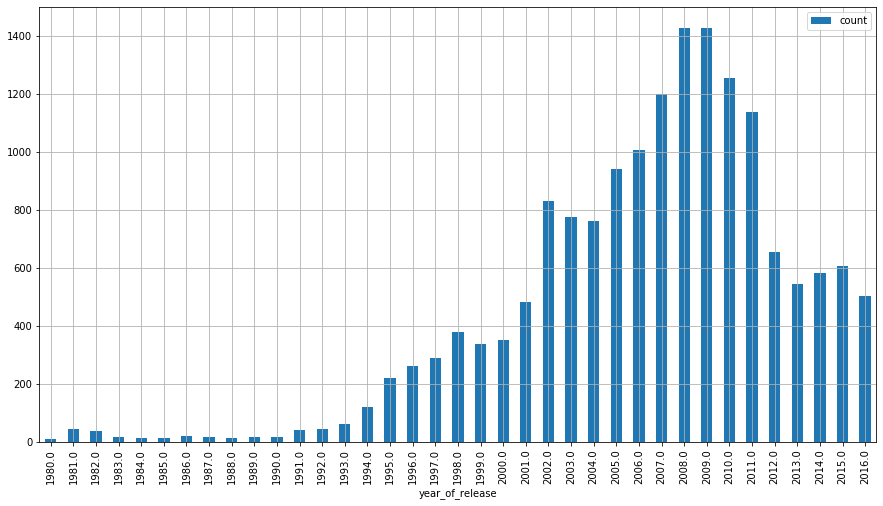

In [13]:
#Покажем количество релизов игр по годам на графике
releases_stat = df.groupby('year_of_release').agg({'name': 'count'})
releases_stat.columns = ['count']
releases_stat.plot.bar(y='count', figsize=(15, 8), grid= True)

<a id='Step_3_2'></a>
#### 3.2 Определение актуального периода исследования

In [14]:
#Исследуем сроки существования платформ:
#Датой возникновения платформы определим дату первого релиза
#Датой исчезновения платформы определим дату последнего релиза
platform_life = df.groupby('platform').agg({'year_of_release': ['min', 'max']})

In [15]:
#Переименуем столбцы для удобства обработки
platform_life.columns = ['start', 'end']

In [16]:
#Найдем продолжительность существования каждой платформы
platform_life['duration'] = (platform_life['end'] - platform_life['start'])

In [17]:
#Для исследования выберем только существующие на момент формирования датасета платформы
platform_life_existing = platform_life.query('end==2016')

In [18]:
# Создадим список существующих платформ
existing_platforms = platform_life_existing.index

In [19]:
platform_life_existing.sort_values(by='duration', ascending=False)

,start,end,duration
platform,,,
PC,1985.0,2016.0,31.0
X360,2005.0,2016.0,11.0
PS3,2006.0,2016.0,10.0
Wii,2006.0,2016.0,10.0
3DS,2011.0,2016.0,5.0
PSV,2011.0,2016.0,5.0
WiiU,2012.0,2016.0,4.0
PS4,2013.0,2016.0,3.0
XOne,2013.0,2016.0,3.0


In [20]:
#PC - самоая долгоживущая из существующих платформ, но старые данные 31 давности уже не актуальны 
#Примем за дату начала актуального периода, дату возникновения платформы X360
#Сделаем срез по дате 
actual_df = df.query('year_of_release>=2005')

<a id='Step_3_3'></a>
#### 3.3 Исследование лидеров по выручке

In [21]:
#Определим суммарную выручку по каждой платформе
sales_by_platform = actual_df.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False)

In [22]:
#Определим отсечку по суммарной выручке для топ-платформ
top_platform_treshold = np.percentile(sales_by_platform.total_sale, 50)

In [23]:
#Определим список топ-платформ по выручке.
top_platforms = sales_by_platform.query('total_sale >= @top_platform_treshold')
top_platforms_names = top_platforms.index

In [24]:
#Посмотрим выручку ведущих платформ
top_platforms

,total_sale
platform,
X360,876.36
Wii,813.47
PS3,796.75
DS,727.81
PS2,338.61
PS4,265.79
3DS,244.54
PSP,242.79


In [25]:
#Создадим срез, в который войдут существующие лидеры по выручке
top_sellers = actual_df.query('platform in @top_platforms_names and platform in @existing_platforms')

In [26]:
#Создадим сводную таблицу выручки лидеров по годам 
top_sellers_by_year = top_sellers.pivot_table(index='platform', columns='year_of_release', values='total_sale', aggfunc='sum')

In [27]:
#Добавим в сводную таблицу выручки лидеров по годам суммарную выручку за актуальный период
#Отсортируем по убыванию
top_sellers_by_year.join(top_platforms).sort_values(by='total_sale', ascending=False)


,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,total_sale
platform,,,,,,,,,,,,,
X360,7.61,47.20,86.68,122.56,109.26,155.80,131.11,91.45,80.82,31.61,10.86,1.40,876.36
Wii,NaN,123.63,139.22,156.33,189.43,117.73,54.37,20.22,7.87,3.45,1.05,0.17,813.47
PS3,NaN,17.30,62.48,101.78,113.08,121.36,135.22,90.87,95.85,40.88,14.70,3.23,796.75
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.12,84.22,100.44,59.01,265.79
3DS,NaN,NaN,NaN,NaN,NaN,NaN,58.80,48.77,53.97,41.75,26.75,14.50,244.54


In [28]:
import seaborn as sns

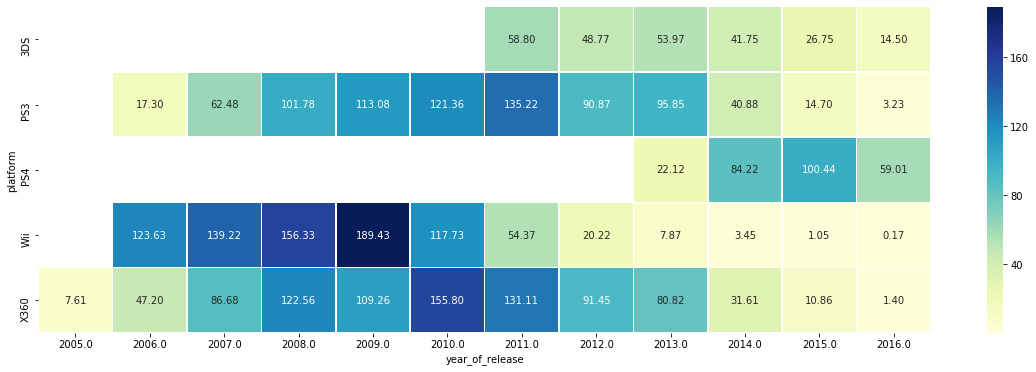

In [29]:
plt.figure(figsize=(20,6))
sns.heatmap(top_sellers_by_year, annot=True, cmap='YlGnBu', linewidths=.5, fmt='.2f' )

<a id='Step_3_4'></a>
#### 3.4 График «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [30]:
#Функция строит график "ящик с усами" для выбранной платформы
def make_boxplot(platform):
    actual_df[actual_df.platform == platform].boxplot('total_sale', figsize=(10, 5))
    plt.xlabel(platform)
    plt.ylim(0, 2)
    plt.show()

In [31]:
#Создадим список платформ, для которых необходимо построить график. Ограничимся только существующими лидерами продаж
top_sellers_names = top_sellers.platform.unique()

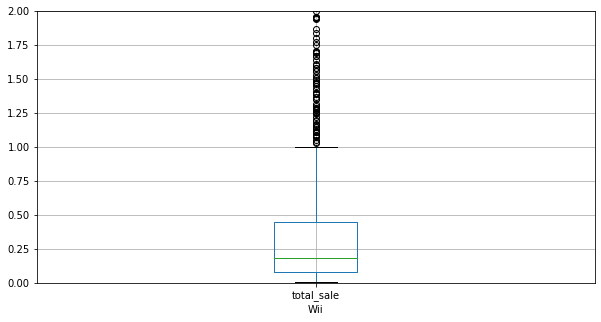

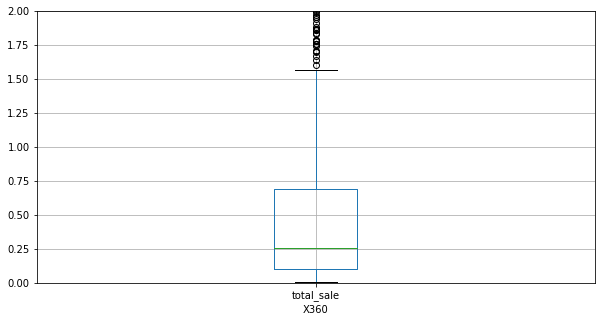

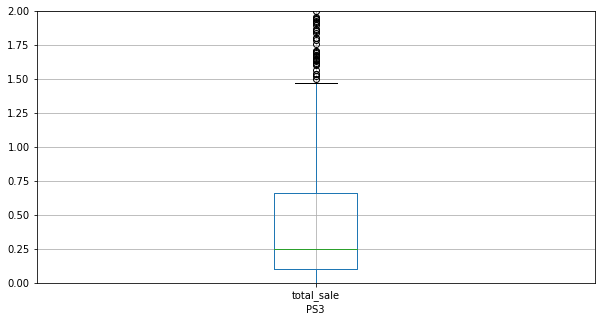

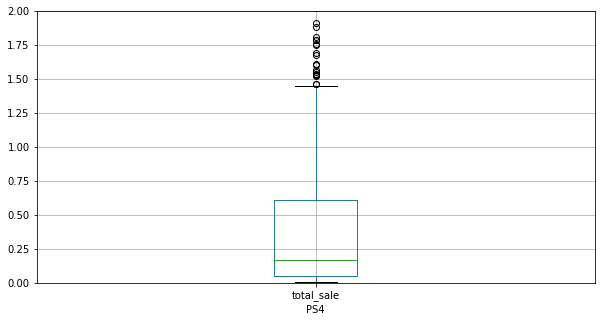

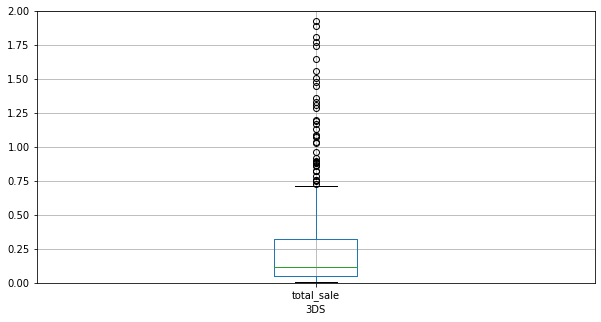

In [32]:
for platform in top_sellers_names:
    make_boxplot(platform)

<a id='Step_3_5'></a>
#### 3.5 Корреляция рейтингов и выручки

In [33]:
#Функция принимает в качестве аргумента столбец с рейтингом и название платформы и строит диаграму рассеяния
def make_scatter(x, platform):
    top_sellers[top_sellers.platform == platform].plot(x=x, y='total_sale', kind='scatter', grid=True, figsize=(10, 5), alpha=0.5)
    plt.xlabel(platform)
    plt.ylim(0, 10)

In [34]:
#Функция принимает в качестве аргумента столбец с рейтингом и название платформы и определят коэфициент корреляции
def calculate_corr(x, platform):
    data = top_sellers[top_sellers.platform == platform]
    corr = data[x].corr(data['total_sale'])
    print('Платформа', platform)
    print('Коэффициент корреляции рейтинга и продаж на платформе {:.2f}'.format(corr))

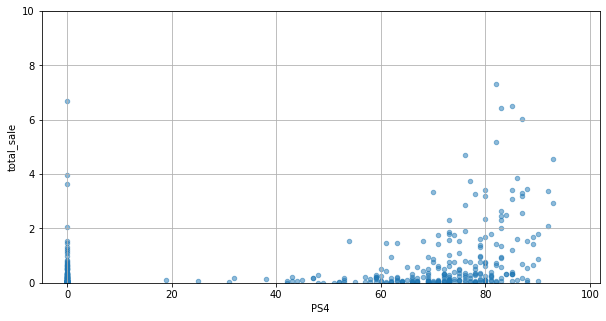

In [35]:
#Построим диагармму рассеяния critic_score - total_sale для плтформы PS4
make_scatter('critic_score', 'PS4')

In [36]:
#Определим коэффициент корреляции critic_score - total_sale для плтформы PS4
calculate_corr('critic_score', 'PS4')

Платформа PS4
Коэффициент корреляции рейтинга и продаж на платформе 0.23


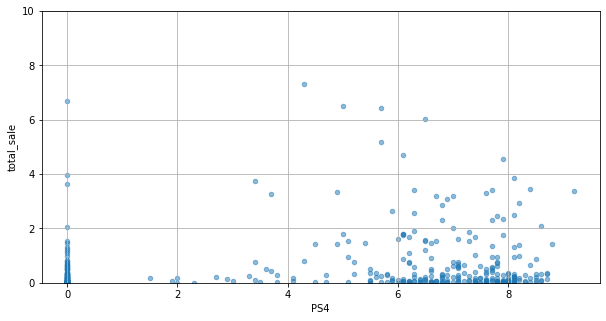

In [37]:
#Построим диагармму рассеяния user_score - total_sale для плтформы PS4
make_scatter('user_score', 'PS4')

In [38]:
#Определим коэффициент корреляции user_score - total_sale для плтформы PS4
calculate_corr('user_score', 'PS4')

Платформа PS4
Коэффициент корреляции рейтинга и продаж на платформе 0.11


Сравним с другими платформами

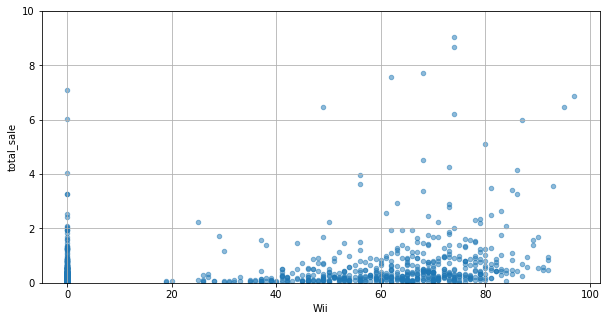

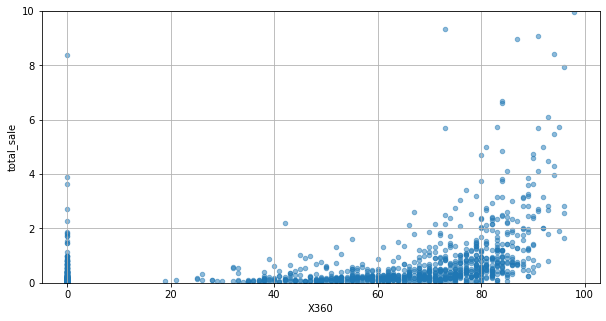

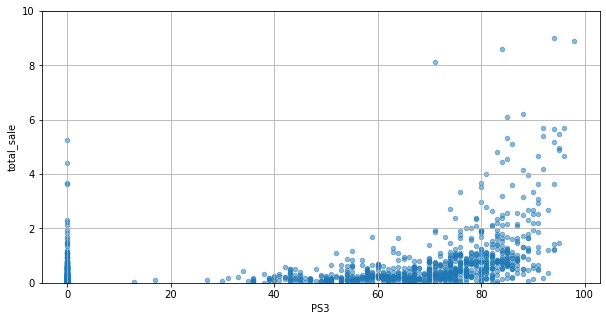

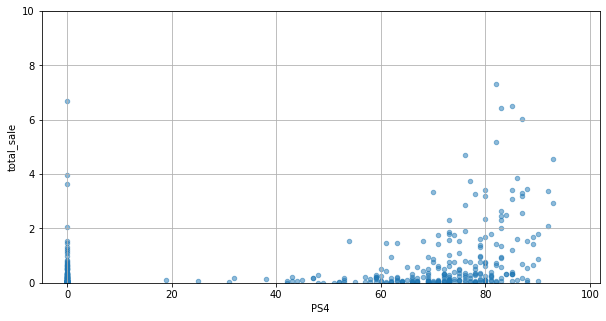

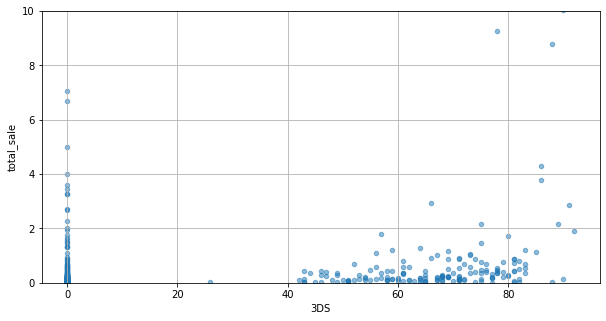

In [39]:
for platform in top_sellers_names:
    make_scatter('critic_score',platform)

In [40]:
print('Влияние рейтинга critic_score на выручку')
for platform in top_sellers_names:
    calculate_corr('critic_score',platform)

Влияние рейтинга critic_score на выручку
Платформа Wii
Коэффициент корреляции рейтинга и продаж на платформе 0.19
Платформа X360
Коэффициент корреляции рейтинга и продаж на платформе 0.31
Платформа PS3
Коэффициент корреляции рейтинга и продаж на платформе 0.36
Платформа PS4
Коэффициент корреляции рейтинга и продаж на платформе 0.23
Платформа 3DS
Коэффициент корреляции рейтинга и продаж на платформе 0.16


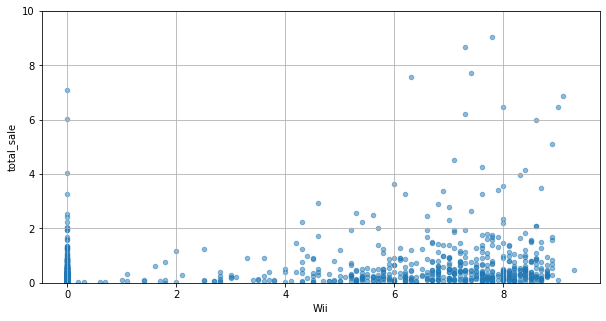

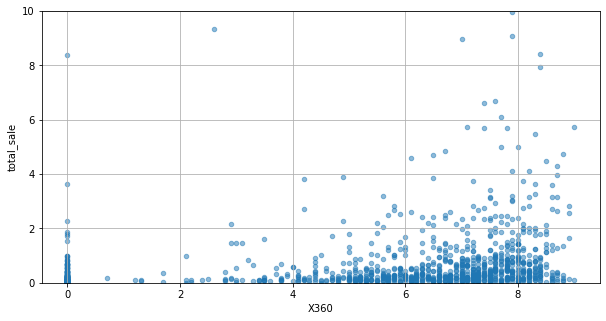

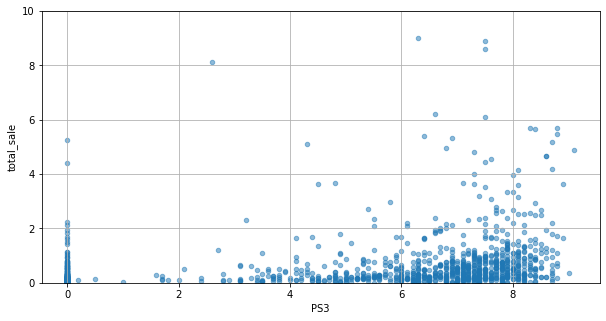

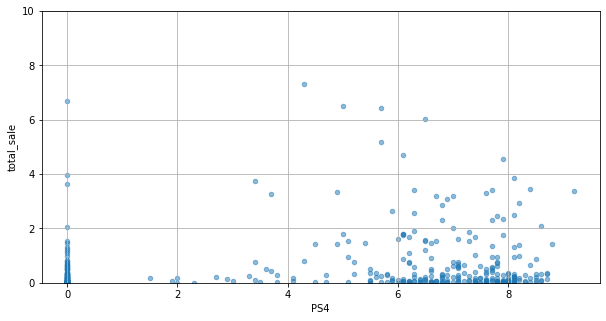

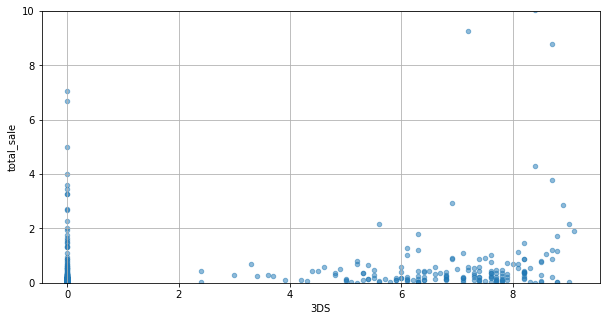

In [41]:
for platform in top_sellers_names:
    make_scatter('user_score',platform)

In [42]:
print('Влияние рейтинга user_score на выручку')
for platform in top_sellers_names:
    calculate_corr('user_score',platform)

Влияние рейтинга user_score на выручку
Платформа Wii
Коэффициент корреляции рейтинга и продаж на платформе 0.19
Платформа X360
Коэффициент корреляции рейтинга и продаж на платформе 0.21
Платформа PS3
Коэффициент корреляции рейтинга и продаж на платформе 0.28
Платформа PS4
Коэффициент корреляции рейтинга и продаж на платформе 0.11
Платформа 3DS
Коэффициент корреляции рейтинга и продаж на платформе 0.15


<a id='Step_3_6'></a>
#### 3.6 Исследование жанров

In [43]:
#Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
top_genres = actual_df.groupby('genre')['total_sale'].sum().sort_values(ascending=False)

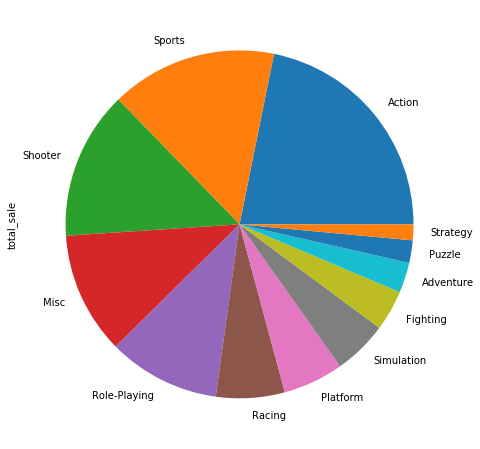

In [44]:
top_genres.plot(kind='pie', figsize=(8,8))

<a id='Step_3_conclusion'></a>
### Вывод:

#### Исследование динамики выпуска игр по годам
1. До 1994 года выпускается менее 100 игр в год
2. После 1994 года начинается активный рост числа новых регилов игр: каждые 5 лет число новых игр удваивается. Динамика, скорее всего, связана с проникновением Интернета
3. Пик - 2008 - 2009: больше 1400 игр в год
4. С 2010 начинается спад
 

#### Определение актуального периода исследования
1. Определены платформы, имеющие релизы на момент проведения исследования:
    - PC
    - X360
    - PS3
    - Wii
    - 3DS
    - PSV
    - WiiU
    - PS4
    - XOne
2. PC - самая долгоживущая из существующих платформ, но старые данные 31-летней давности уже не актуальны 
3. Примем за дату начала актуального периода, дату возникновения платформы X360 - 2005 год

#### Исследование лидеров по выручке
1. Топ-5 лидеров по выручке выглядит следующим образом:
    - X360
    - Wii
    - PS3
    - PS4
    - 3DS
2. В период с 2010 по 2015 положительная динамика по выручке:
    - PS4
3. Сделаем допущение, что за 2016 год представлены данные о выручке не за полный год.

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам
Наиболее выгодные платформы:
1. PS4
2. PS3
3. X360

#### Корреляция рейтингов и выручки
1. Коэффициент корреляции critic_score - total_sale для плтформы PS4 составляет 0,23 - влияние рейтингов критиков на выручку есть, но оно незначительное
2. Коэффициент корреляции user_score - total_sale для плтформы PS4 составляет 0,11 - - влияние рейтингов пользователей на выручку есть, но оно незначительное
3. Исследование других платформ показало аналогичную ситуацию.

#### Исследование жанров
Наиболее выгодные жанры:
    - Action
    - Sports
    - Shooter

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_4'></a>
### Шаг 4. Портрет пользователя

<a id='Step_4_1'></a>
#### 4.1 Топ-5 популярных платформ

In [45]:
#Функция принимает столбец с необходимым параметром и столбец с выручкой по региону и выдает топ-5 по заданным параметрам
def get_stat (column, region):
    region_total = actual_df[region].sum()
    region_stat = actual_df.groupby(column).agg({region: 'sum'})
    region_stat['share'] = (region_stat[region]/region_total).apply('{:.1%}'.format)
    region_stat = region_stat.sort_values(by=region, ascending=False)
    display(region_stat.head())

In [46]:
#Наиболее популярные платформы в регионе NA
get_stat ('platform', 'na_sales')

,na_sales,share
platform,,
X360,595.74,22.7%
Wii,486.87,18.5%
PS3,390.13,14.8%
DS,371.98,14.2%
PS2,200.49,7.6%


In [47]:
#Наиболее популярные платформы в регионе EU
get_stat ('platform', 'eu_sales')

,eu_sales,share
platform,,
PS3,327.21,20.2%
X360,268.32,16.6%
Wii,258.32,16.0%
DS,184.48,11.4%
PS4,141.09,8.7%


In [48]:
#Наиболее популярные платформы в регионе JP
get_stat ('platform', 'jp_sales')

,jp_sales,share
platform,,
DS,171.35,27.8%
3DS,100.62,16.3%
PS3,79.41,12.9%
PSP,73.85,12.0%
Wii,68.28,11.1%


<a id='Step_4_2'></a>
#### 4.2 Топ-5 популярных жанров

In [49]:
get_stat ('genre', 'na_sales')

,na_sales,share
genre,,
Action,580.04,22.1%
Sports,432.70,16.5%
Shooter,400.96,15.3%
Misc,311.82,11.9%
Role-Playing,211.85,8.1%


In [50]:
get_stat ('genre', 'eu_sales')

,eu_sales,share
genre,,
Action,372.58,23.0%
Sports,265.61,16.4%
Shooter,248.07,15.3%
Misc,167.09,10.3%
Racing,129.05,8.0%


In [51]:
get_stat ('genre', 'jp_sales')

,jp_sales,share
genre,,
Role-Playing,179.60,29.2%
Action,108.39,17.6%
Misc,72.49,11.8%
Sports,52.51,8.5%
Platform,36.32,5.9%


<a id='Step_4_3'></a>
#### 4.3 Влияние рейтинга ESRB на продажи в регионах

In [52]:
get_stat ('rating', 'na_sales')

,na_sales,share
rating,,
E,873.10,33.2%
M,607.34,23.1%
T,479.08,18.2%
E10+,343.02,13.0%
EC,1.53,0.1%


In [53]:
get_stat ('rating', 'eu_sales')

,eu_sales,share
rating,,
E,508.71,31.5%
M,414.11,25.6%
T,258.17,16.0%
E10+,181.92,11.2%
AO,0.61,0.0%


In [54]:
get_stat ('rating', 'jp_sales')

,jp_sales,share
rating,,
E,147.33,23.9%
T,91.32,14.8%
M,46.23,7.5%
E10+,39.05,6.3%
AO,0.00,0.0%


<a id='Step_4_conclusion'></a>
### Вывод:
#### Топ-5 популярных платформ
1. Лидеры в регионе NA
    - X360
    - Wii
    - PS3
    - DS
    - PS2
2. Лидеры в регионе EU
    - PS3
    - X360
    - Wii
    - DS
    - PS4
3. Лидеры в регионе EU
    - DS
    - 3DS
    - PS3
    - PSP
    - Wii
4. Особенности:
    - В каждом регионе свой лидер
    - В регионах NA и EU топ-3 лидеров отличаются только позицией в рейтинге
    - В регионе JP топ-3 лидеров полностью отличается от NA и EU

#### Топ-5 популярных жанров
1. Лидеры в регионе NA
    - Action
    - Sports
    - Shooter
    - Misc
    - Role-Playing
2. Лидеры в регионе EU
    - Action
    - Sports
    - Shooter
    - Misc
    - Racing
3. Лидеры в регионе EU
    - Role-Playing
    - Action
    - Misc
    - Sports
    - Platform
4. Особенности:
    - В регионах NA и EU топ-3 полностью совпадают
 
#### Влияние рейтинга ESRB на продажи в регионах
1. Лидеры в регионе NA
    - E
    - M
    - T
    - E10+
    - EC
2. Лидеры в регионе EU
    - E
    - M
    - T
    - E10+
    - AO
3. Лидеры в регионе EU
    - E
    - T
    - M
    - E10+
    - AO
4. Особенности:
    - Влияние рейтингов ESRB идентично во всех регионах

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_5'></a>
### Шаг 5. Проверка гипотез

<a id='Step_5_1'></a>
#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC отличаются"

In [55]:
xbox = actual_df.query('platform == "XOne" and user_score != 0')
xbox_user_ratings = xbox['user_score']

In [56]:
np.var(xbox_user_ratings)

1.8965188383045526

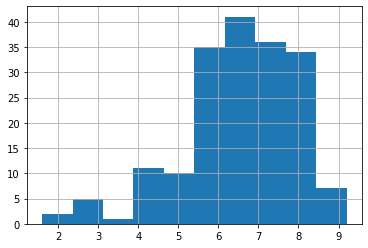

In [57]:
xbox_user_ratings.hist()

In [58]:
pc = actual_df.query('platform == "PC" and user_score != 0')
pc_user_ratings = pc['user_score'] 


In [59]:
np.var(pc_user_ratings)

2.293981207322248

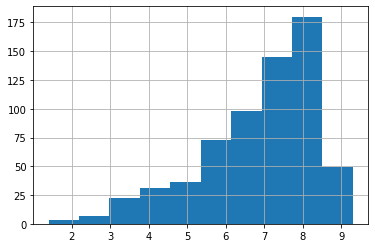

In [60]:
pc_user_ratings.hist()

In [61]:
alpha = .05 

results = st.ttest_ind(
    xbox_user_ratings, 
    pc_user_ratings, 
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.002348015535956376
Отвергаем нулевую гипотезу


<a id='Step_5_2'></a>
#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые"

Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports отличаются"

In [62]:
actual_df.genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [63]:
action = actual_df.query('genre == "Action" and user_score != 0')
action_user_ratings = action['user_score']

In [64]:
np.var(action_user_ratings)

1.8671391428300448

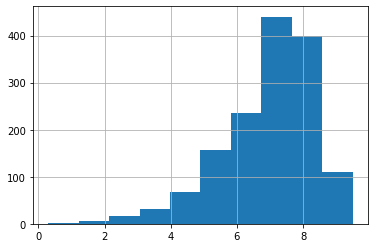

In [65]:
action_user_ratings.hist()

In [66]:
sports = actual_df.query('genre == "Sports" and user_score != 0')
sports_user_ratings = sports['user_score']

In [67]:
np.var(sports_user_ratings)

2.685982839163841

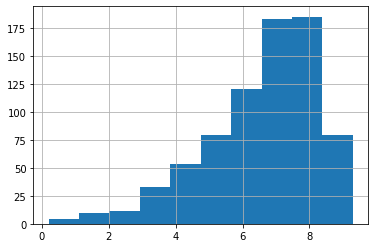

In [68]:
sports_user_ratings.hist()

In [69]:
alpha = .05 

results = st.ttest_ind(
    action_user_ratings, 
    sports_user_ratings,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.717661260563439e-09
Отвергаем нулевую гипотезу


<a id='Step_5_conclusion'></a>
### Вывод:
1. Мы отвергли нулевую гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
    - Рейтинги платформ отличаются

2. Мы отвергли нулевую гипотезу: "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
    - Рейтинги жанров отличаются

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_6'></a>
## Общий вывод:
1. Мы исследовали данные по релизам игр с 2005 по 2016. Был выбран период активности существующих на момент проведения исследования платформ.
2. Был составлен топ Топ-5 платформ лидеров по выручке:
    - X360
    - Wii
    - PS3
    - PS4
    - 3DS
3. При этом положительная динамика по выручке обнаружена только у одной платформы:
    - PS4
4. При выборе платформы для релиза необходимо учитывать региональные особенности. Существенные особенности в регионе JP
5. Обнаружено, что пользовательские рейтинги рейтинги критиков не оказывают существенного влияния на выручку от продажи игр.



**<a href='#top'>Вернуться в начало</a>**